Scipy:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


Text(0, 0.5, 'Min and Max Temperatures')

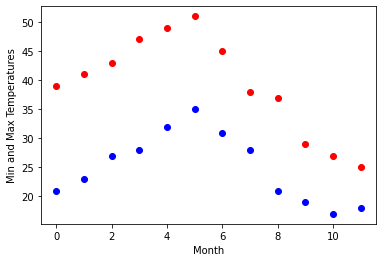

In [10]:
max_temp = np.array ([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.plot(months,max_temp,'ro')
plt.plot(months,min_temp,'bo')
plt.xlabel('Month')
plt.ylabel('Min and Max Temperatures')

In [11]:
#Fitting it into a Periodic Function¶

from scipy import optimize

def yearly_temp(times, avg , ampl , time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temp, months,
                                      max_temp, [20, 10, 0])

res_min, cov_min = optimize.curve_fit(yearly_temp, months,
                                      min_temp, [-40, 20, 0])


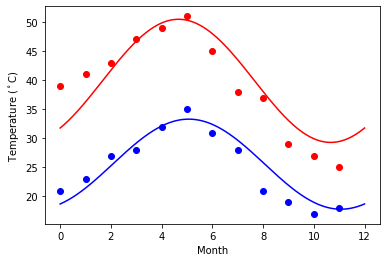

In [12]:
#Plotting the Fit¶

days = np.linspace(0,12,num=365)
plt.figure()
plt.plot(months,max_temp,'ro')
plt.plot(days,yearly_temp(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temp(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


In [13]:
#Matplotlib :¶

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
#Q1.Create a pie chart presenting the male/female proportion¶

males = titanic[titanic['sex']=='male'].index.value_counts().count()
print("male count is {}".format(males))
females =titanic[titanic['sex']=='female'].index.value_counts().count()
print("female count is {}".format(females))


male count is 843
female count is 466


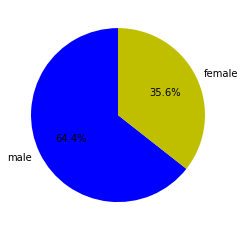

In [15]:
list_1 = [males,females]
gender = ['male','female']
colors = ['b','y']
plt.pie(list_1,labels=gender,colors=colors,startangle=90,autopct='%.1f%%')
plt.show()


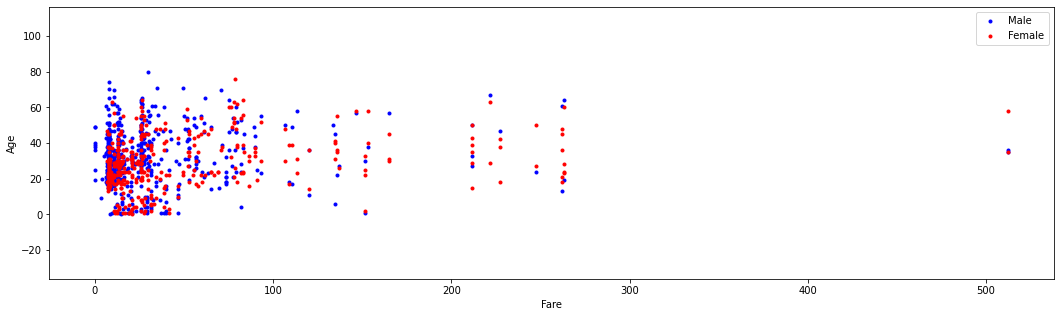

In [16]:
#Q2 Create a scatterplot with the Fare paid and the Age, differ the plot color by gender¶

male = titanic[titanic['sex']=='male']
female = titanic[titanic['sex']=='female']
fig = plt.figure(figsize=(18,5))
plt.plot(male.fare, male.age, '.b', label='Male')
plt.plot(female.fare, female.age, '.r', label='Female')
plt.axis('equal')
plt.xlabel('Fare')
plt.ylabel('Age')
leg = plt.legend()
